In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('prepared_data/preprocessed_full_data.csv')
print(df.info())
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23385313 entries, 0 to 23385312
Data columns (total 38 columns):
 #   Column             Dtype  
---  ------             -----  
 0   timestamp          object 
 1   detector_id        int64  
 2   hour               int64  
 3   quality            float64
 4   veh_total          int64  
 5   speed_total        float64
 6   veh_cars           int64  
 7   speed_cars         float64
 8   veh_trucks         int64  
 9   speed_trucks       float64
 10  year               int64  
 11  day_of_week        int64  
 12  is_weekend         int64  
 13  month              int64  
 14  season             object 
 15  is_holiday         int64  
 16  is_rush_hour       int64  
 17  is_school_holiday  int64  
 18  free_flow_speed    float64
 19  speed_ratio        float64
 20  congestion_index   float64
 21  road_name          object 
 22  road_position      object 
 23  direction          object 
 24  lane               object 
 25  lon             

,timestamp,detector_id,hour,quality,veh_total,speed_total,veh_cars,speed_cars,veh_trucks,speed_trucks,...,dew_point,precipitation,relative_humidity,visibility,cloud_cover,condition,icon,is_rain,is_snow,is_fog
0,2015-01-01 00:00:00,100101010000369,0,1.0,138,75.1,135,75.1,3,74.0,...,4.8,0.0,99.0,4000.0,1.0,dry,cloudy,0,0,0
1,2015-01-01 00:00:00,100101010000874,0,1.0,45,47.7,40,49.1,5,36.8,...,4.8,0.0,99.0,4000.0,1.0,dry,cloudy,0,0,0
2,2015-01-01 00:00:00,100101010000975,0,1.0,33,50.5,32,50.5,1,50.0,...,4.8,0.0,99.0,4000.0,1.0,dry,cloudy,0,0,0
3,2015-01-01 00:00:00,100101010001076,0,1.0,55,52.5,52,53.5,3,36.0,...,4.8,0.0,99.0,4000.0,1.0,dry,cloudy,0,0,0
4,2015-01-01 00:00:00,100101010001177,0,1.0,58,49.2,42,56.3,16,30.5,...,4.8,0.0,99.0,4000.0,1.0,dry,cloudy,0,0,0


In [3]:
freeflow = df.groupby("detector_id")["speed_total"].max()
df["free_flow_speed"] = df["detector_id"].map(freeflow)

# Compute speed ratio / congestion index
df["speed_ratio"] = df["speed_total"] / df["free_flow_speed"]
df["congestion_index"] = 1 - df["speed_ratio"]
df.describe()

,detector_id,hour,quality,veh_total,speed_total,veh_cars,speed_cars,veh_trucks,speed_trucks,year,...,lat,temperature,dew_point,precipitation,relative_humidity,visibility,cloud_cover,is_rain,is_snow,is_fog
count,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,...,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07,2.338531e+07
mean,1.001010e+14,1.177779e+01,9.931473e-01,2.985390e+02,4.602391e+01,2.773404e+02,4.665227e+01,2.111101e+01,3.914196e+01,2.019136e+03,...,5.250123e+01,1.120745e+01,6.368131e+00,6.136891e-02,7.545987e+01,3.173221e+04,6.592418e-01,1.886120e-01,2.815421e-02,7.802034e-03
std,2.897204e+04,6.699180e+00,2.804159e-02,2.178193e+02,1.090008e+01,2.068826e+02,1.115134e+01,4.115299e+01,1.394057e+01,2.701930e+00,...,4.131468e-02,8.097503e+00,6.297893e+00,4.674099e-01,1.963080e+01,1.542553e+04,3.770654e-01,3.912001e-01,1.654133e-01,8.798388e-02
min,1.001010e+14,0.000000e+00,8.300000e-01,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e-01,2.015000e+03,...,5.239825e+01,-1.240000e+01,-1.630000e+01,0.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.001010e+14,6.000000e+00,1.000000e+00,1.120000e+02,3.960000e+01,1.000000e+02,4.000000e+01,4.000000e+00,3.000000e+01,2.017000e+03,...,5.248007e+01,4.900000e+00,1.700000e+00,0.000000e+00,6.000000e+01,2.000000e+04,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.001010e+14,1.200000e+01,1.000000e+00,2.670000e+02,4.640000e+01,2.470000e+02,4.700000e+01,1.000000e+01,3.980000e+01,2.019000e+03,...,5.250967e+01,1.080000e+01,6.600000e+00,0.000000e+00,7.900000e+01,3.500000e+04,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.001010e+14,1.700000e+01,1.000000e+00,4.420000e+02,5.260000e+01,4.130000e+02,5.320000e+01,2.300000e+01,4.850000e+01,2.021000e+03,...,5.253087e+01,1.720000e+01,1.130000e+01,0.000000e+00,9.300000e+01,4.500000e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.001010e+14,2.300000e+01,5.000000e+00,3.719000e+03,2.600000e+02,3.689000e+03,2.660000e+02,2.789000e+03,2.640000e+02,2.024000e+03,...,5.258630e+01,3.750000e+01,2.240000e+01,3.970000e+01,1.000000e+02,7.000000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
df_small = df[df["year"]==2023]
del df

In [5]:
def historical_baseline(df, window_size=5):
    df = df.sort_values(by=['detector_id', 'timestamp'])
    df['historical_avg_congestion'] = df.groupby('detector_id')['congestion_index'].transform(
        lambda x: x.rolling(window=window_size, min_periods=1).mean().shift(1)
    )
    return df

In [6]:
df_pred = historical_baseline(df_small)
print(df_pred[['detector_id', 'timestamp', 'congestion_index', 'historical_avg_congestion']].head())
#print accuracy
df_pred = df_pred.dropna(subset=['historical_avg_congestion', 'congestion_index'])
mae = np.mean(np.abs(df_pred['congestion_index'] - df_pred['historical_avg_congestion']))
print(f"Mean Absolute Error of Historical Baseline: {mae}")
#smape
smape = 100 * np.mean(2 * np.abs(df_pred['congestion_index'] - df_pred['historical_avg_congestion']) / (np.abs(df_pred['congestion_index']) + np.abs(df_pred['historical_avg_congestion'])))
print(f"Symmetric Mean Absolute Percentage Error of Historical Baseline: {smape}%")

              detector_id            timestamp  congestion_index  \
19849647  100101010000167  2023-01-02 13:00:00          0.452055   
19849876  100101010000167  2023-01-02 14:00:00          0.657534   
19850112  100101010000167  2023-01-02 15:00:00          0.684932   
19850339  100101010000167  2023-01-02 16:00:00          0.616438   
19850566  100101010000167  2023-01-02 17:00:00          0.513699   

          historical_avg_congestion  
19849647                        NaN  
19849876                   0.452055  
19850112                   0.554795  
19850339                   0.598174  
19850566                   0.602740  
Mean Absolute Error of Historical Baseline: 0.04593079781330768
Symmetric Mean Absolute Percentage Error of Historical Baseline: 11.272631590127915%


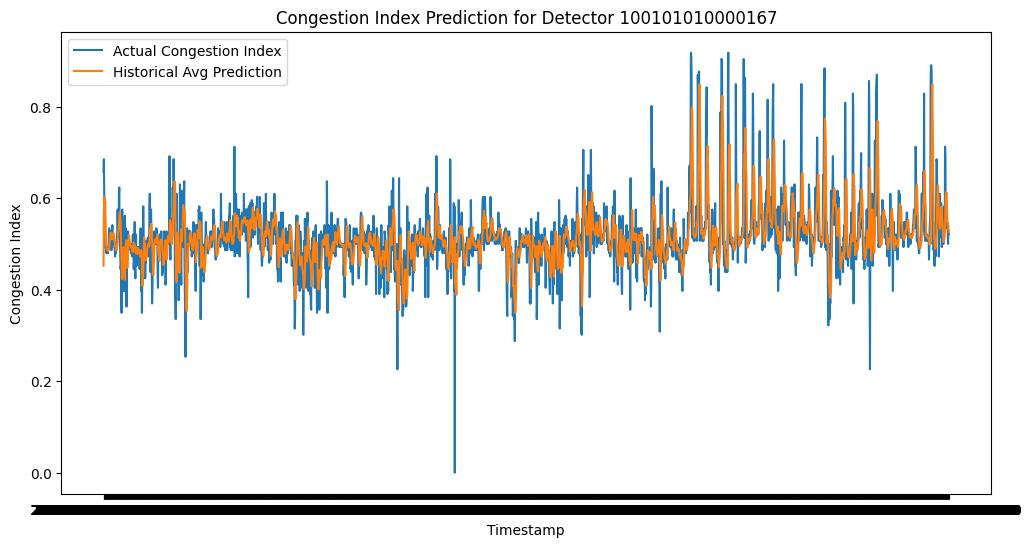

In [7]:
# plot results
import matplotlib.pyplot as plt

sample_detector = df_pred['detector_id'].unique()[0]
sample_data = df_pred[(df_pred['detector_id'] == sample_detector) & (df_pred["month"]<=4)]
plt.figure(figsize=(12, 6))
plt.plot(sample_data['timestamp'], sample_data['congestion_index'], label='Actual Congestion Index')
plt.plot(sample_data['timestamp'], sample_data['historical_avg_congestion'], label='Historical Avg Prediction')
plt.xlabel('Timestamp')
plt.ylabel('Congestion Index')
plt.title(f'Congestion Index Prediction for Detector {sample_detector}')
plt.legend()
plt.show()

In [8]:
df_pred["congestion_index"].describe()


count    1.884932e+06
mean     4.622984e-01
std      1.770679e-01
min      0.000000e+00
25%      3.205128e-01
50%      4.368932e-01
75%      5.905834e-01
max      9.958089e-01
Name: congestion_index, dtype: float64

C:\Users\adib4\AppData\Local\Temp\ipykernel_25940\1654983121.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['lr_prediction'] = lr_model.predict(test_df[features])


Mean Absolute Error of Linear Regression: 0.09822481367113663
Symmetric Mean Absolute Percentage Error of Linear Regression: 22.887046412575987%


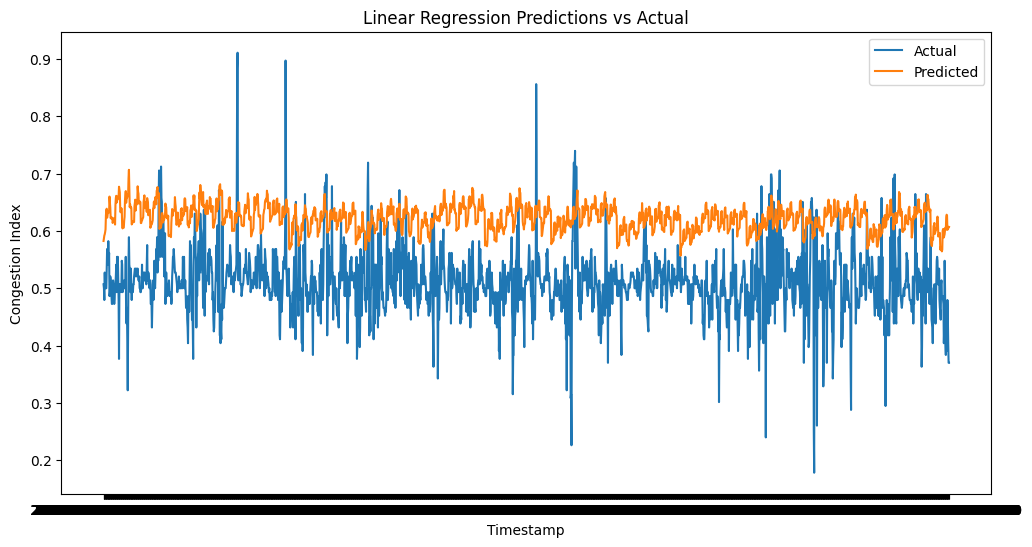

In [9]:
# Linear regression model
from sklearn.linear_model import LinearRegression

train_df = df_pred[df_pred['month']<=9]
test_df = df_pred[df_pred['month']>=10]

features = ['hour', 'day_of_week', 'month', 'is_holiday', 'temperature', 'precipitation', "is_weekend", # "season",
            "is_rush_hour", "is_school_holiday", "dew_point", "relative_humidity", "visibility", "cloud_cover", 
            "is_rain", "is_snow", "is_fog", "detector_id", "free_flow_speed"]

lr_model = LinearRegression()
lr_model.fit(train_df[features], train_df['congestion_index'])
test_df['lr_prediction'] = lr_model.predict(test_df[features])
lr_mae = np.mean(np.abs(test_df['congestion_index'] - test_df['lr_prediction']))
print(f"Mean Absolute Error of Linear Regression: {lr_mae}")
lr_smape = 100 * np.mean(2 * np.abs(test_df['congestion_index'] - test_df['lr_prediction']) / (np.abs(test_df['congestion_index']) + np.abs(test_df['lr_prediction'])))
print(f"Symmetric Mean Absolute Percentage Error of Linear Regression: {lr_smape}%")

# plot results of linear regression
sample_data_lr = test_df[(test_df['detector_id'] == sample_detector) & (test_df["month"]>=10)]
plt.figure(figsize=(12, 6))
plt.plot(sample_data_lr['timestamp'], sample_data_lr['congestion_index'], label='Actual')
plt.plot(sample_data_lr['timestamp'], sample_data_lr['lr_prediction'], label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Congestion Index')
plt.title('Linear Regression Predictions vs Actual')
plt.legend()
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1224
[LightGBM] [Info] Number of data points in the train set: 1407698, number of used features: 17
[LightGBM] [Info] Start training from score 0.462311


C:\Users\adib4\AppData\Local\Temp\ipykernel_25940\2695389354.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["lgb_prediction"] = pred


Mean Absolute Error of LightGBM: 0.05009559366426861
Symmetric Mean Absolute Percentage Error of LightGBM: 12.260299041689949%


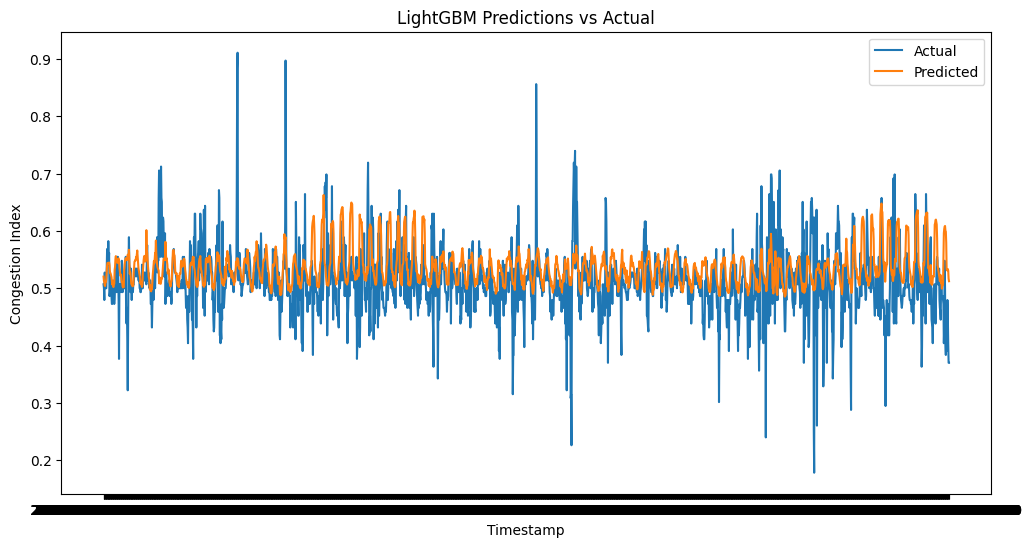

In [10]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor(
    n_estimators=5000,
    learning_rate=0.01,
    num_leaves=60,
    subsample=0.8,
    colsample_bytree=0.8
)

lgb.fit(train_df[features], train_df["congestion_index"])
pred = lgb.predict(test_df[features])
test_df["lgb_prediction"] = pred
lgb_mae = np.mean(np.abs(test_df['congestion_index'] - test_df['lgb_prediction']))
print(f"Mean Absolute Error of LightGBM: {lgb_mae}")
lgb_smape = 100 * np.mean(2 * np.abs(test_df['congestion_index'] - test_df['lgb_prediction']) / (np.abs(test_df['congestion_index']) + np.abs(test_df['lgb_prediction'])))
print(f"Symmetric Mean Absolute Percentage Error of LightGBM: {lgb_smape}%")

# plot results of lightgbm
sample_data_lgb = test_df[(test_df['detector_id'] == sample_detector) & (test_df["month"]>=10)]
plt.figure(figsize=(12, 6))
plt.plot(sample_data_lgb['timestamp'], sample_data_lgb['congestion_index'], label='Actual')
plt.plot(sample_data_lgb['timestamp'], sample_data_lgb['lgb_prediction'], label='Predicted')
plt.xlabel('Timestamp')
plt.ylabel('Congestion Index')
plt.title('LightGBM Predictions vs Actual')
plt.legend()
plt.show()